**Import Libraries**

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Load Dataset**

In [4]:
#loading dataset
df=pd.read_csv("loan_approval_dataset.csv")
df.drop(["loan_id"],axis=1,inplace=True)

**Data Preprocessing**

In [6]:
# understanding dataset and checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [7]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
# removing extra space before the name of each column
df.columns=df.columns.str.strip()

In [14]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [9]:
# creating new DataFrame to convert categorical values to numeric values
new_df=df.copy()

In [10]:
new_df["isGraduate"]=new_df.education
new_df.isGraduate=new_df.isGraduate.str.replace("Not Graduate","0")
new_df.isGraduate=new_df.isGraduate.str.replace("Graduate","1")
new_df.isGraduate=pd.to_numeric(new_df.isGraduate,downcast="integer")

In [11]:
new_df["isSelfEmployed"]=new_df.self_employed
new_df.isSelfEmployed=new_df.isSelfEmployed.str.replace("No","0")
new_df.isSelfEmployed=new_df.isSelfEmployed.str.replace("Yes","1")
new_df.isSelfEmployed=pd.to_numeric(new_df.isSelfEmployed,downcast="integer")

In [12]:
new_df["is_loan_status"]=new_df.loan_status
new_df.is_loan_status=new_df.is_loan_status.str.replace("Rejected","0")
new_df.is_loan_status=new_df.is_loan_status.str.replace("Approved","1")
new_df.is_loan_status=pd.to_numeric(new_df.is_loan_status,downcast="integer")

In [13]:
# remove columns with categorical values from new dataframe
new_df.drop(["education","self_employed","loan_status"],axis=1,inplace=True)
new_df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,isGraduate,isSelfEmployed,is_loan_status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0


In [14]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


**HeatMap**

Text(158.08159722222223, 0.5, 'Features')

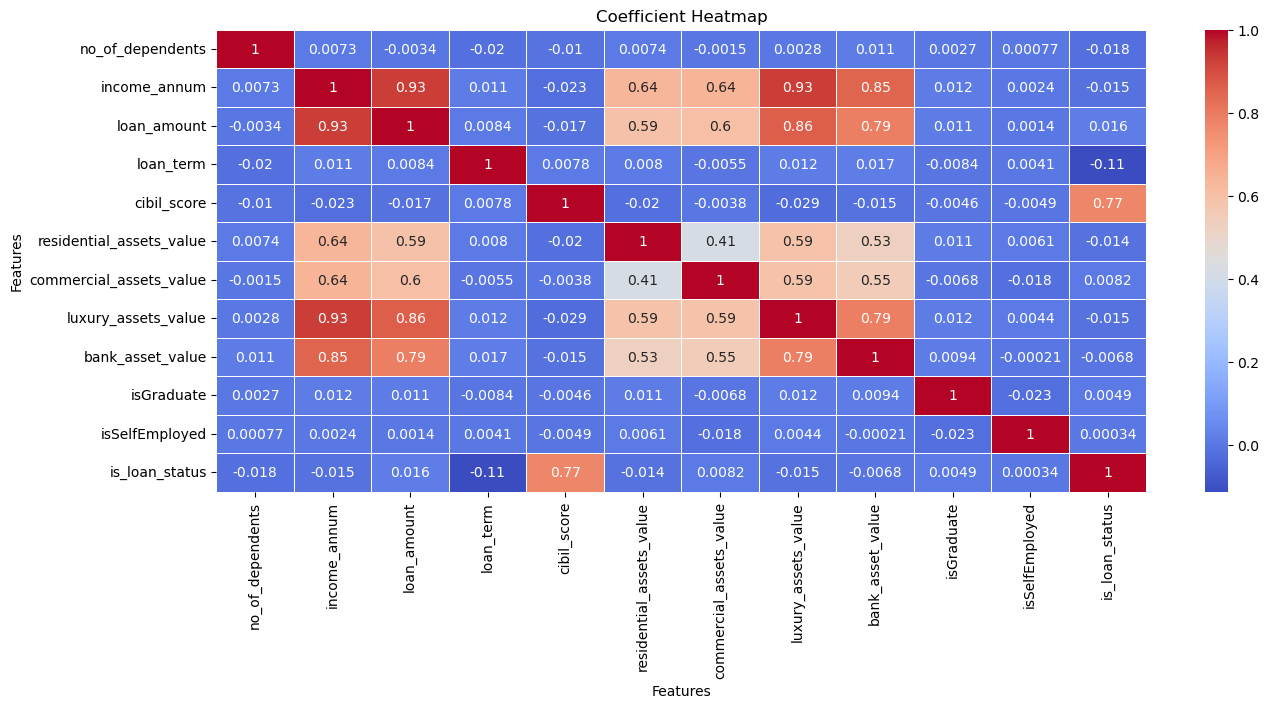

In [16]:
#heatmap to visualize and quantify relationships between variables effectively.
plt.figure(figsize=(15, 6))
sns.heatmap(new_df.corr(), annot=True, linewidth=0.5,cmap='coolwarm')
plt.title('Coefficient Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

The coefficients of "commercial_assets_value" , "bank_asset_value", "isGraduate" , "isSelfEmployed" are very low as compared to other features. So, we should drop them in order to simplify the model and potentially improve its performance. 

In [17]:
#drop unnecessary columns from dataframe 
new_df.drop(["commercial_assets_value","bank_asset_value","isGraduate","isSelfEmployed"],axis=1,inplace=True)

In [18]:
#drop unnecessary columns from dataframe 
df.drop(["commercial_assets_value","bank_asset_value","education","self_employed"],axis=1,inplace=True)

In [19]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,luxury_assets_value,loan_status
0,2,9600000,29900000,12,778,2400000,22700000,Approved
1,0,4100000,12200000,8,417,2700000,8800000,Rejected
2,3,9100000,29700000,20,506,7100000,33300000,Rejected
3,3,8200000,30700000,8,467,18200000,23300000,Rejected
4,5,9800000,24200000,20,382,12400000,29400000,Rejected


In [20]:
new_df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,luxury_assets_value,is_loan_status
0,2,9600000,29900000,12,778,2400000,22700000,1
1,0,4100000,12200000,8,417,2700000,8800000,0
2,3,9100000,29700000,20,506,7100000,33300000,0
3,3,8200000,30700000,8,467,18200000,23300000,0
4,5,9800000,24200000,20,382,12400000,29400000,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   income_annum              4269 non-null   int64 
 2   loan_amount               4269 non-null   int64 
 3   loan_term                 4269 non-null   int64 
 4   cibil_score               4269 non-null   int64 
 5   residential_assets_value  4269 non-null   int64 
 6   luxury_assets_value       4269 non-null   int64 
 7   loan_status               4269 non-null   object
dtypes: int64(7), object(1)
memory usage: 266.9+ KB


In [22]:
# convert categorical value to numeric for data modelling
loan_status=pd.get_dummies(df["loan_status"],drop_first=True)
loan_status.astype(int)

,Rejected
0,0
1,1
2,1
3,1
4,1
...,...
4264,1
4265,0
4266,1
4267,0


In [23]:
#merging the numeric value column to original dataframe
df.drop(["loan_status"],axis=1,inplace=True)
df=pd.concat([df,loan_status],axis=1)

In [24]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,luxury_assets_value,Rejected
0,2,9600000,29900000,12,778,2400000,22700000,False
1,0,4100000,12200000,8,417,2700000,8800000,True
2,3,9100000,29700000,20,506,7100000,33300000,True
3,3,8200000,30700000,8,467,18200000,23300000,True
4,5,9800000,24200000,20,382,12400000,29400000,True


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   income_annum              4269 non-null   int64
 2   loan_amount               4269 non-null   int64
 3   loan_term                 4269 non-null   int64
 4   cibil_score               4269 non-null   int64
 5   residential_assets_value  4269 non-null   int64
 6   luxury_assets_value       4269 non-null   int64
 7    Rejected                 4269 non-null   bool 
dtypes: bool(1), int64(7)
memory usage: 237.8 KB


In [26]:
#bringing column in standard format
df.columns
df.columns=df.columns.str.strip()

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'luxury_assets_value',
       ' Rejected'],
      dtype='object')

In [28]:
df.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'luxury_assets_value',
       'Rejected'],
      dtype='object')

In [29]:
df.Rejected=df.Rejected.astype(int)

In [30]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,luxury_assets_value,Rejected
0,2,9600000,29900000,12,778,2400000,22700000,0
1,0,4100000,12200000,8,417,2700000,8800000,1
2,3,9100000,29700000,20,506,7100000,33300000,1
3,3,8200000,30700000,8,467,18200000,23300000,1
4,5,9800000,24200000,20,382,12400000,29400000,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   income_annum              4269 non-null   int64
 2   loan_amount               4269 non-null   int64
 3   loan_term                 4269 non-null   int64
 4   cibil_score               4269 non-null   int64
 5   residential_assets_value  4269 non-null   int64
 6   luxury_assets_value       4269 non-null   int64
 7   Rejected                  4269 non-null   int32
dtypes: int32(1), int64(7)
memory usage: 250.3 KB


**Modelling**

In [33]:
#import library
from sklearn.model_selection import GridSearchCV, train_test_split

In [34]:
#splitting into train and test data from data frame
X=df.drop(["Rejected"],axis=1)
Y=df.Rejected

In [35]:
#splitting train and test data into x and y
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [36]:
#checking for any discrepancy during splitting the data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3201 entries, 3977 to 860
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          3201 non-null   int64
 1   income_annum              3201 non-null   int64
 2   loan_amount               3201 non-null   int64
 3   loan_term                 3201 non-null   int64
 4   cibil_score               3201 non-null   int64
 5   residential_assets_value  3201 non-null   int64
 6   luxury_assets_value       3201 non-null   int64
dtypes: int64(7)
memory usage: 200.1 KB


In [37]:
#checking for any discrepancy during splitting the data
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 3201 entries, 3977 to 860
Series name: Rejected
Non-Null Count  Dtype
--------------  -----
3201 non-null   int32
dtypes: int32(1)
memory usage: 37.5 KB


**Logistic Regression**

In [38]:
#importing library
from sklearn.linear_model import LogisticRegression

In [39]:
#initialize a logistic regression model
lr_model=LogisticRegression()

In [40]:
#fit the logistic regression model on the training data
lr_model.fit(X_train,Y_train)

LogisticRegression()

In [41]:
#predictions by the model
Y_pred=lr_model.predict(X_test)

In [42]:
#import library
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [43]:
#analyze the performance of the model
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       678
           1       0.76      0.37      0.49       390

    accuracy                           0.73      1068
   macro avg       0.74      0.65      0.65      1068
weighted avg       0.73      0.73      0.70      1068



In [44]:
Y_test.value_counts()

Rejected
0    678
1    390
Name: count, dtype: int64

In [45]:
#analyze the confusion matrix
confusion_matrix(Y_test,Y_pred)

array([[633,  45],
       [247, 143]], dtype=int64)

In [46]:
#import library
from sklearn.model_selection import cross_val_score,KFold

In [47]:
#calculate accuracy scores using K-fold cross-validation
accuracies=cross_val_score(estimator=lr_model,X=X_train,y=Y_train,cv=10)

In [48]:
accuracies.mean()

0.7800827492211837

**Accuracy is : 0.7800827492211837**

In [ ]:
# Improve model accuracy using feature engineering by dropping the "loan_amount" column
df.drop(["loan_amount"], axis=1, inplace=True)

In [50]:
df.head()

,no_of_dependents,income_annum,loan_term,cibil_score,residential_assets_value,luxury_assets_value,Rejected
0,2,9600000,12,778,2400000,22700000,0
1,0,4100000,8,417,2700000,8800000,1
2,3,9100000,20,506,7100000,33300000,1
3,3,8200000,8,467,18200000,23300000,1
4,5,9800000,20,382,12400000,29400000,1


In [51]:
#splitting the train and test data
X=df.drop(["Rejected"],axis=1)

In [52]:
#splitting train and test data into x and y
X_new_train,X_new_test,Y_new_train,Y_new_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [53]:
#checking for Any Discrepancies During Data Splitting"
X_new_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3201 entries, 3977 to 860
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          3201 non-null   int64
 1   income_annum              3201 non-null   int64
 2   loan_term                 3201 non-null   int64
 3   cibil_score               3201 non-null   int64
 4   residential_assets_value  3201 non-null   int64
 5   luxury_assets_value       3201 non-null   int64
dtypes: int64(6)
memory usage: 175.1 KB


In [54]:
#checking for Any Discrepancies During Data Splitting"
Y_new_train.info()

<class 'pandas.core.series.Series'>
Index: 3201 entries, 3977 to 860
Series name: Rejected
Non-Null Count  Dtype
--------------  -----
3201 non-null   int32
dtypes: int32(1)
memory usage: 37.5 KB


In [55]:
#fit the logistic regression model on the training data
lr_model.fit(X_new_train,Y_new_train)

LogisticRegression()

In [56]:
#predictions by the model
Y_new_pred=lr_model.predict(X_new_test)

In [57]:
#print the classification report for the test set predictions
print(classification_report(Y_new_test,Y_new_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       678
           1       0.79      0.59      0.67       390

    accuracy                           0.79      1068
   macro avg       0.79      0.75      0.76      1068
weighted avg       0.79      0.79      0.78      1068



In [58]:
#analyzing Performance of Model
confusion_matrix(Y_new_test,Y_new_pred)

array([[616,  62],
       [161, 229]], dtype=int64)

***- True Negatives (TN): 616 cases where the model correctly predicted that the loan application was not eligible.***

***- False Positives (FP): 62 cases where the model incorrectly predicted that the loan application was eligible when it was not.***

***- False Negatives (FN): 161 cases where the model incorrectly predicted that the loan application was not eligible when it was.***

***- True Positives (TP): 229 cases where the model correctly predicted the loan application's eligibility.***


In [59]:

accuracies=cross_val_score(estimator=lr_model,X=X_new_train,y=Y_new_train,cv=10)

In [60]:
accuracies.mean()

0.7906834112149533

**HyperParameter**

In [62]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Solver options
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to find the best parameters
grid_search.fit(X_new_train, Y_new_train)

# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
y_new_pred = best_model.predict(X_new_test)

# Evaluate the best model
accuracy = accuracy_score(Y_new_test, y_new_pred)
print(f"Test Accuracy: {accuracy}")

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Hyperparameters: {'C': 10.0, 'max_iter': 200, 'solver': 'lbfgs'}
Test Accuracy: 0.7911985018726592


***Test Accuracy is 0.7911985018726592***

In [63]:
# Generate classification report
report = classification_report(Y_new_test, y_new_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       678
           1       0.79      0.59      0.67       390

    accuracy                           0.79      1068
   macro avg       0.79      0.75      0.76      1068
weighted avg       0.79      0.79      0.78      1068



In [64]:
#analyze confusion matrix
confusion_matrix(Y_new_test, y_new_pred)

array([[616,  62],
       [161, 229]], dtype=int64)

***- True Negatives (TN): 616 cases where the model correctly predicted that the loan application was not eligible.***

***- False Positives (FP): 62 cases where the model incorrectly predicted that the loan application was eligible when it was not.***

***- False Negatives (FN): 161 cases where the model incorrectly predicted that the loan application was not eligible when it was.***

***- True Positives (TP): 229 cases where the model correctly predicted the loan application's eligibility.***
